In [3]:
import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# Download latest version
path = kagglehub.dataset_download("uom190346a/health-and-demographics-dataset", path = 'Life_Expectancy_Data.csv')
df = pd.read_csv(path)
df.head()

100%|█████████████████████████████████████████████████████████████████| 195k/195k [00:01<00:00, 163kB/s]


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,19.1,83,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,18.6,86,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,18.1,89,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,17.6,93,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,17.2,97,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
# Check null cols
df.columns[df.isna().any()].tolist()

[]

In [71]:
# Task: Check if Alchohol was consumed more in developed counteries or developing countries in the year 2012

df_2012 = df[df['Year'] == 2012]
df_2012.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,17.6,93,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
19,Albania,2012,Developing,76.9,86,0,5.14,412.443356,99,9,55.8,1,99,5.59,99,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2
34,Algeria,2012,Developing,75.1,113,21,0.66,555.926083,95,18,56.1,24,95,6.14,95,0.1,5564.825660,37565847.0,5.9,5.8,0.732,14.4
45,Angola,2012,Developing,56.0,358,72,8.24,256.122524,75,4458,21.5,110,75,3.30,75,2.6,4598.249988,259615.0,8.8,8.6,0.508,10.3
53,Argentina,2012,Developing,75.9,12,9,8.35,1133.558003,91,2,61.0,10,99,5.20,91,0.1,12969.771200,4296739.0,1.0,0.9,0.822,17.2


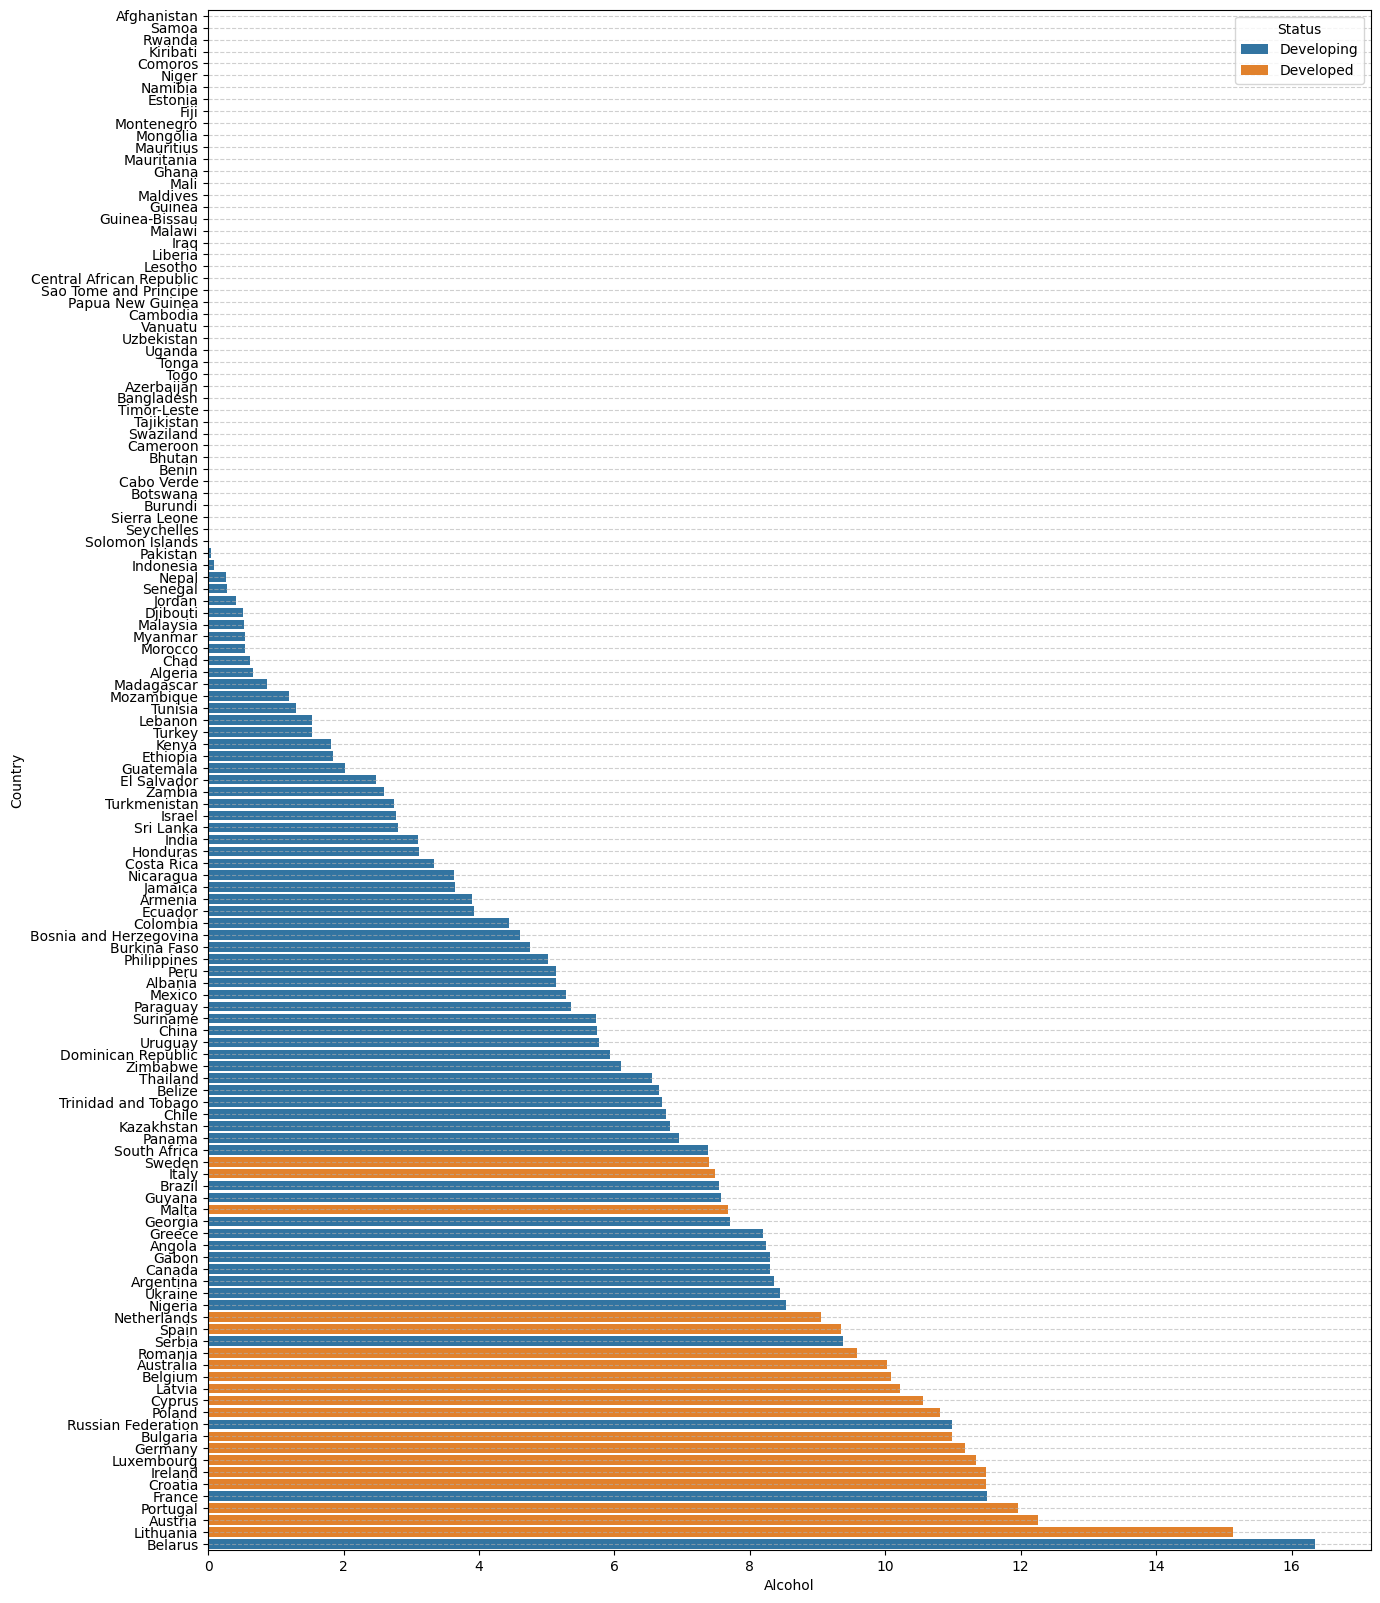

In [72]:
sorted_df = df_2012.sort_values(by='Alcohol', ascending=True)
plt.figure(figsize=(15, 20))
sns.barplot(x = 'Alcohol', y = 'Country', data = sorted_df, hue = 'Status')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [73]:
# Generally we can see that it generally overall higher in Developing nations overall, But few of the Developed are on higher end as well.
# Lets calculate the mean of both to set a hypothesis

mean_developed_2012 = df_2012[(df['Status'] == 'Developed')]
mean_developing_2012 = df_2012[(df['Status'] == 'Developing')]

print(mean_developed_2012['Alcohol'].describe())
print(mean_developing_2012['Alcohol'].describe())

count    19.000000
mean     10.424737
std       1.849172
min       7.400000
25%       9.465000
50%      10.550000
75%      11.415000
max      15.140000
Name: Alcohol, dtype: float64
count    110.000000
mean       2.739545
std        3.433832
min        0.010000
25%        0.010000
50%        0.640000
75%        5.252500
max       16.350000
Name: Alcohol, dtype: float64


/var/folders/f0/6c2mckf96hnbv1zk3wjpzcl00000gn/T/ipykernel_994/999599686.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_developed_2012 = df_2012[(df['Status'] == 'Developed')]
/var/folders/f0/6c2mckf96hnbv1zk3wjpzcl00000gn/T/ipykernel_994/999599686.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_developing_2012 = df_2012[(df['Status'] == 'Developing')]


In [74]:
# H0: Average consumption of alchohol in developing countries is more than developed
# H1: Average consumption of alchohol in developed counries is more than developing

# Using tTest
res = stats.ttest_ind(mean_developed_2012['Alcohol'], mean_developing_2012['Alcohol'])
res

# We can reject H0, and it means that developed countries have more drinkers

TtestResult(statistic=np.float64(9.499149191703498), pvalue=np.float64(1.706029826348853e-16), df=np.float64(127.0))

In [75]:
# Lets try find some reln. using chiSquare between status and alchol
df_2012['Alcohol_Level'] = pd.qcut(df['Alcohol'], q=3, labels=['Low', 'Medium', 'High'])
crosstab = pd.crosstab(df_2012['Alcohol_Level'], df_2012['Status'])

stat, p, dof, arr = stats.chi2_contingency(crosstab)
p

# As we can see the p val is very low, which means there is strong reln between status of a country and its drinkers

/var/folders/f0/6c2mckf96hnbv1zk3wjpzcl00000gn/T/ipykernel_994/2943176478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2012['Alcohol_Level'] = pd.qcut(df['Alcohol'], q=3, labels=['Low', 'Medium', 'High'])


np.float64(1.7158580833954614e-11)

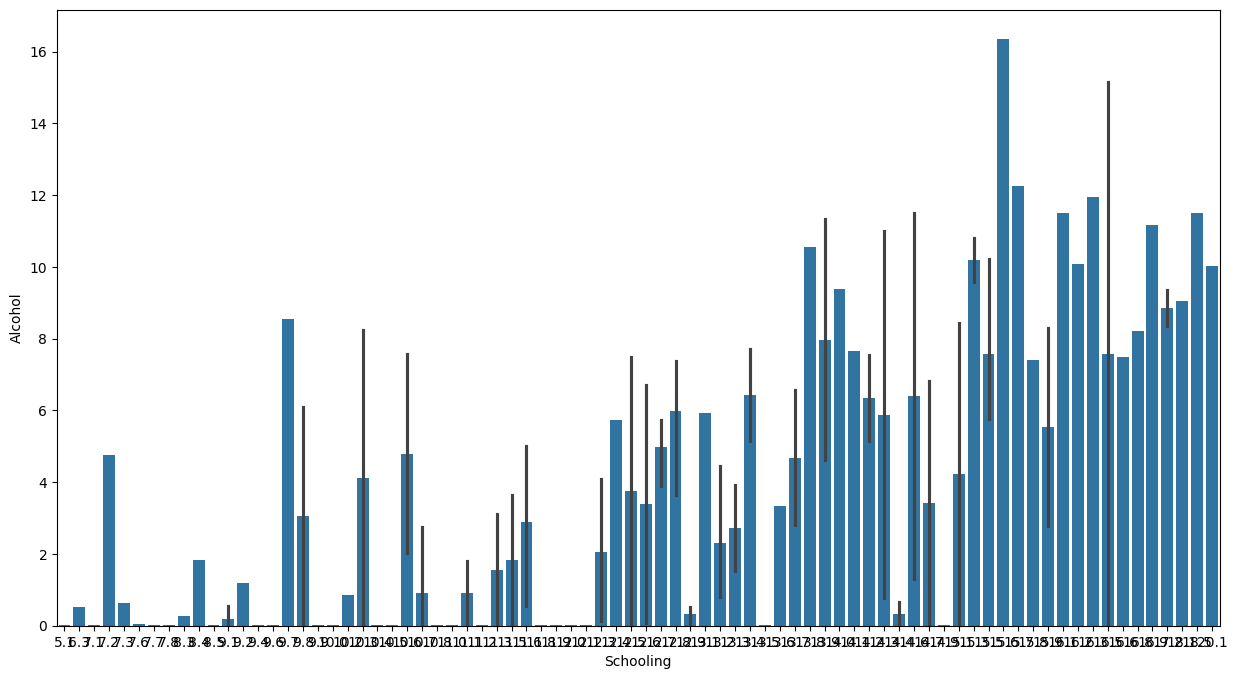

In [79]:
# Lets see how education levels affected alchohol levels

sorted_df = df_2012.sort_values(by='Alcohol', ascending=True)
plt.figure(figsize=(15, 8))
sns.barplot(x = 'Schooling', y = 'Alcohol', data = sorted_df)
plt.show()

# LoL does this mean more years of schooling -> more avg. alcohol consumed?? Let's verify that

In [83]:
# HO -> years of schooling is not in anyways possible related to alcohol consumption
# H1 -> more years of schooling more the alcohol consumption

res = stats.pearsonr(df_2012['Schooling'], df_2012['Alcohol'])
res

# As we can see corr-val > 0 & p-val <0.05
# It means we can reject H0 and H1 was correct

PearsonRResult(statistic=np.float64(0.6230578207157181), pvalue=np.float64(3.1561234755215194e-15))

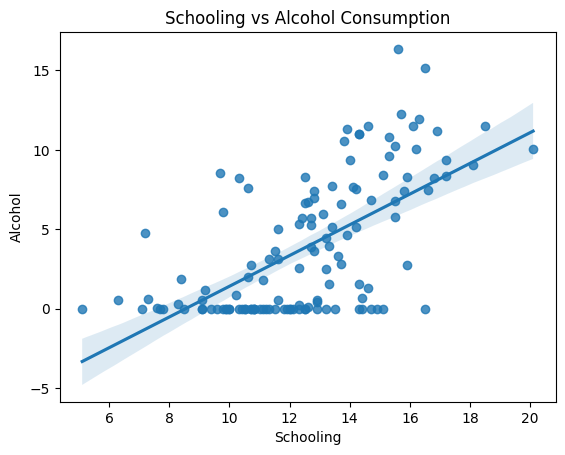

In [86]:
sns.regplot(x=df_2012['Schooling'], y=df_2012['Alcohol'])
plt.title("Schooling vs Alcohol Consumption")
plt.show()
